# Challenge Description
Build decision tree, then match with the simplest random forest.

## Notes
Unit 3, Lesson 2.6 Challenge

Pick your own dataset, do PCA, RFE (another way to do feature selection) (sklearn.feature_selection rfe), holdout groups, cross validation.

All projects need to have this set up from now on, so Lesson 2 challenge is going to need same setup.  Need to think about the Lesson 1 necessary need to measure distance.

It is also a given that you need to understand dataset, so if you need to cleanup or alter it, do it.

Don't use knn for this.
Apply decision tree & apply random forest: use the libraries, not manually.

ensemble.RandomForestClassifier()

1. look at dataset, clean out weird
2. apply holdouts or split
3. cross validation on test set
4. apply pca
5. cv on pca test set
6. use selectkbest
7. from sklearn.feature_selection import SelectKBest
8. supposed to apply to fishtail after seeing it.
9. Example: from sklearn.feature_selection import SelectKBest
10. dtree = DecisionTreeClassifier()

Basically: decision tree > PCA (and use CV but don't go wild with it) > Random Forest > Time Execution.

## Information
First data is obtained from: https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking/data
However, there isn't enough variety of columns to work with.

Second data is obtained from: https://www.kaggle.com/etiennelq/french-employment-by-town/data
This is a data on French employment, salaries, and population per town.  The focus of this dataset will be salaries.

# Examine and Clean Up Data

In [163]:
import math
import warnings
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:3f}'.format

# Suppress warnings
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

# Bring in data
df = pd.read_csv("net_salary_per_town_categories.csv")
# Rename column headers to make it easier to work with
df.columns = ['Town_Code','Town_Name','Mean_Net_Salary_MNS','Executive_MNS','Middle_Manager_MNS','Employee_MNS','Worker_MNS','Women_MNS','Feminine_Executive_MNS','Feminine_Middle_Manager_MNS','Feminine_Employee_MNS','Feminine_Worker_MNS','Men_MNS','Masculine_Executive_MNS','Masculine_Middle_Manager_MNS','Masculine_Employee_MNS','Masculine_Worker_MNS','18-25_Years_MNS','26-50_Years_MNS','>50_Years_MNS','Women_18-25_Years_MNS','Women_26-50_Years_MNS','Women_>50_Years_MNS','Men_18-25_Years_MNS','Men_26-50_Years_MNS','Men_>50_Years_MNS']
# Remove NaN values
df = df.fillna(0)

df.head()

,Town_Code,Town_Name,Mean_Net_Salary_MNS,Executive_MNS,Middle_Manager_MNS,Employee_MNS,Worker_MNS,Women_MNS,Feminine_Executive_MNS,Feminine_Middle_Manager_MNS,...,Masculine_Worker_MNS,18-25_Years_MNS,26-50_Years_MNS,>50_Years_MNS,Women_18-25_Years_MNS,Women_26-50_Years_MNS,Women_>50_Years_MNS,Men_18-25_Years_MNS,Men_26-50_Years_MNS,Men_>50_Years_MNS
0,01004,Ambérieu-en-Bugey,13.700000,24.200000,15.500000,10.300000,11.200000,11.600000,19.100000,13.200000,...,11.600000,10.500000,13.700000,16.100000,9.700000,11.800000,12.500000,11.000000,14.900000,18.600000
1,01007,Ambronay,13.500000,22.100000,14.700000,10.700000,11.400000,11.900000,19.000000,13.300000,...,11.700000,9.800000,13.800000,14.600000,9.200000,12.200000,12.500000,10.200000,14.900000,16.400000
2,01014,Arbent,13.500000,27.600000,15.600000,11.100000,11.100000,10.900000,19.500000,11.700000,...,11.800000,9.300000,13.300000,16.000000,8.900000,10.600000,12.500000,9.600000,15.100000,18.600000
3,01024,Attignat,12.900000,21.800000,14.100000,11.000000,11.300000,11.400000,19.000000,13.000000,...,11.600000,9.600000,12.900000,14.200000,9.300000,11.400000,12.200000,9.700000,13.800000,15.900000
4,01025,Bâgé-la-Ville,13.000000,22.800000,14.100000,10.500000,11.100000,11.600000,19.400000,13.600000,...,11.400000,9.400000,12.800000,15.200000,9.000000,11.800000,12.300000,9.700000,13.400000,16.900000


In [164]:
# Remove columns not to be added
df = df.drop(columns=['Town_Code','Town_Name'])

df.head()

,Mean_Net_Salary_MNS,Executive_MNS,Middle_Manager_MNS,Employee_MNS,Worker_MNS,Women_MNS,Feminine_Executive_MNS,Feminine_Middle_Manager_MNS,Feminine_Employee_MNS,Feminine_Worker_MNS,...,Masculine_Worker_MNS,18-25_Years_MNS,26-50_Years_MNS,>50_Years_MNS,Women_18-25_Years_MNS,Women_26-50_Years_MNS,Women_>50_Years_MNS,Men_18-25_Years_MNS,Men_26-50_Years_MNS,Men_>50_Years_MNS
0,13.700000,24.200000,15.500000,10.300000,11.200000,11.600000,19.100000,13.200000,10.100000,9.600000,...,11.600000,10.500000,13.700000,16.100000,9.700000,11.800000,12.500000,11.000000,14.900000,18.600000
1,13.500000,22.100000,14.700000,10.700000,11.400000,11.900000,19.000000,13.300000,10.600000,10.000000,...,11.700000,9.800000,13.800000,14.600000,9.200000,12.200000,12.500000,10.200000,14.900000,16.400000
2,13.500000,27.600000,15.600000,11.100000,11.100000,10.900000,19.500000,11.700000,10.800000,9.500000,...,11.800000,9.300000,13.300000,16.000000,8.900000,10.600000,12.500000,9.600000,15.100000,18.600000
3,12.900000,21.800000,14.100000,11.000000,11.300000,11.400000,19.000000,13.000000,10.300000,9.900000,...,11.600000,9.600000,12.900000,14.200000,9.300000,11.400000,12.200000,9.700000,13.800000,15.900000
4,13.000000,22.800000,14.100000,10.500000,11.100000,11.600000,19.400000,13.600000,10.200000,9.800000,...,11.400000,9.400000,12.800000,15.200000,9.000000,11.800000,12.300000,9.700000,13.400000,16.900000


In [165]:
df.describe() # Summary of the data

,Mean_Net_Salary_MNS,Executive_MNS,Middle_Manager_MNS,Employee_MNS,Worker_MNS,Women_MNS,Feminine_Executive_MNS,Feminine_Middle_Manager_MNS,Feminine_Employee_MNS,Feminine_Worker_MNS,...,Masculine_Worker_MNS,18-25_Years_MNS,26-50_Years_MNS,>50_Years_MNS,Women_18-25_Years_MNS,Women_26-50_Years_MNS,Women_>50_Years_MNS,Men_18-25_Years_MNS,Men_26-50_Years_MNS,Men_>50_Years_MNS
count,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,...,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000
mean,13.706386,23.703836,14.575876,10.564505,11.235650,12.038026,20.220502,13.274260,10.308879,9.827161,...,11.498189,9.549766,13.495444,15.877220,9.161565,12.055160,13.174143,9.820872,14.485981,17.679809
std,2.559329,2.836183,1.490110,0.811775,1.221755,1.787995,2.327550,0.990166,0.747563,1.104684,...,1.289598,0.997444,2.363144,3.585860,0.453023,1.825306,2.249391,1.539949,2.852490,4.530257
min,10.200000,16.000000,11.600000,8.700000,8.300000,9.300000,12.000000,10.600000,8.700000,6.100000,...,8.900000,7.900000,9.700000,10.500000,7.500000,9.100000,9.500000,7.800000,9.600000,10.800000
25%,12.100000,21.900000,13.800000,10.000000,10.600000,10.900000,18.800000,12.600000,9.800000,9.200000,...,10.800000,9.200000,12.000000,13.700000,8.900000,10.900000,11.700000,9.400000,12.700000,14.900000
50%,13.000000,23.200000,14.400000,10.400000,11.000000,11.500000,20.000000,13.100000,10.100000,9.700000,...,11.300000,9.500000,12.900000,15.000000,9.100000,11.600000,12.600000,9.700000,13.800000,16.600000
75%,14.400000,24.900000,15.100000,10.900000,11.600000,12.700000,21.400000,13.800000,10.600000,10.200000,...,11.900000,9.700000,14.300000,16.900000,9.400000,12.700000,14.000000,10.000000,15.500000,19.000000
max,43.300000,51.500000,54.600000,17.500000,46.300000,26.700000,35.500000,19.000000,16.100000,28.100000,...,53.200000,60.600000,38.100000,56.900000,12.000000,26.600000,31.000000,93.300000,45.400000,68.600000


# Apply Data Splitting (Holdout Groups) to Dataset

In [166]:
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
# http://scikit-learn.org/stable/modules/cross_validation.html
    
## Holdout Groups is commonly starting at 30% of data, but 1% to 50% is okay.
data = df.drop(['Mean_Net_Salary_MNS'],axis=1)
target = df['Mean_Net_Salary_MNS']
print(data.shape)
print(target.shape)

# Use train_test_split to create the necessary training and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)

(5136, 23)
(5136,)
(3595, 23) (3595,)
(1541, 23) (1541,)
82685
3595
35443
1541


Sample the training set while holding out 30% of the data for testing our classifier.

In [167]:
# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf = svm.SVR()
clf.fit(X_test, y_test)
clf.score(X_test, y_test)

0.8040155809234164

# Apply Cross Validation to Test Set

In [168]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, data, target, cv=10)
scores

array([0.93464324, 0.96693638, 0.91506066, 0.84745944, 0.9613666 ,
       0.90744828, 0.89437693, 0.80592644, 0.42010924, 0.64408799])

The mean score and the 95% confidence interval of the score estimate is given above.

In [169]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.33)


# Apply PCA on Train Sets
Here we are now using the training datas, the result is far less data, but the PCA applied still looks similar to the linear regression version.

In [170]:
# X is the scalar of the df data.  Standardize features by removing the mean and scaling to unit variance.
# Dataset might behave badly if the individual feature do no look like standard distributed data.

# Prepare the X and Y variable, where Y is dataframe column.
# fit_transform fits the model with X and apply dimensionality reduction on X.
pca = PCA(0.90)
pca.fit(X_train)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.singular_values_)

[97.65831406  7.72555654  5.26548251]
[0.80089033 0.06335685 0.04318193]
[0.80089033 0.86424718 0.9074291 ]
[592.43901015 166.63028001 137.56505416]


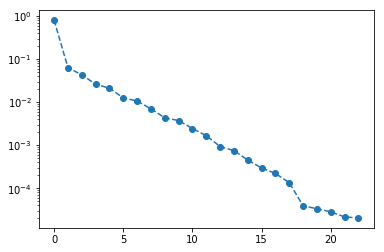

In [171]:
# Y axis says how much can be explained, where 9th variable has very small impact on predicting Property.
pca = PCA().fit(X_train)

plt.semilogy(pca.explained_variance_ratio_, '--o')
plt.show()

Each of 9 variables (out of 10) have different ranges. Standard Scalar makes it so all these different ranges makes sense.

Standard = each number in the ranges are subtracted by the mean, and divided by standard deviation squared.

Standard Scalar = same thing, but now the range is 0 to 1. Make everything comparable.

Some examples are tests, intelligence levels, etc. Trying to standardize everyone.

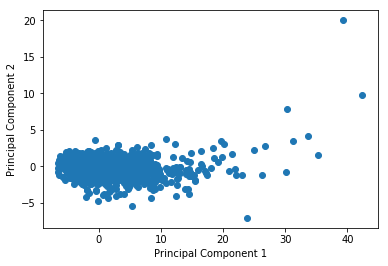

(3595, 23)
(3595, 8)


In [172]:
# Which variables/how many variables to keep
from sklearn.preprocessing import StandardScaler

# Pick the smallest number of Principal Components that explain 95% of the variables.
# That number is = to number of variables you should choose.
X_train_std = StandardScaler().fit_transform(X_train)
sklearn_pca = PCA(0.95)

Y_train_pca = sklearn_pca.fit_transform(X_train_std)

plt.scatter(Y_train_pca[:,0], Y_train_pca[:,3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Each of the column is equal to the principal component.
print(X_train_std.shape)
print(Y_train_pca.shape)

# Apply Cross Validation to PCA Test Set

In [173]:
from sklearn.model_selection import cross_val_score
score_pca = cross_val_score(pca, X_train_std, Y_train_pca, cv=5)

print(score_pca)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_pca.mean(), score_pca.std() * 2))

[  0.17099665  -2.80212396 -10.33348679   0.78779477   0.75384491]
Unweighted Accuracy: -2.28 (+/- 8.47)


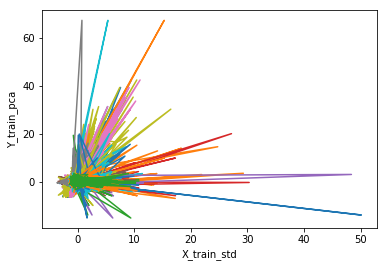

In [174]:
# https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
# plot misclassification error vs k
plt.plot(X_train_std, Y_train_pca)
plt.xlabel('X_train_std')
plt.ylabel('Y_train_pca')
plt.show()

# Apply SelectKBest
Use Selectkbest to score the features using a function (or any function) and then remove all but the k highest scoring features.

In [175]:
# https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
# https://stackoverflow.com/questions/46927545/get-feature-names-of-selectkbest-function-python

from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(X_train, y_train)

# Get indices of the selected features
data_new = selector.transform(data)
print(data_new.shape)
print(selector.get_support(indices=True))
print(data_new)

(5136, 5)
[ 4  9 15 16 21]
[[11.6 15.  13.7 16.1 14.9]
 [11.9 14.7 13.8 14.6 14.9]
 [10.9 15.3 13.3 16.  15.1]
 ...
 [11.5 12.3 11.9 14.9 12.1]
 [10.8 11.7 11.5 13.1 11.8]
 [ 9.8 10.6 10.2 12.6 10.4]]


# Build Decision Tree
Shoul use the regressor instead of using DecisionTreeClassifier.  This is because the data is confused with continuous type.

In [176]:
# http://scikit-learn.org/stable/modules/tree.html
# https://github.com/scikit-learn/scikit-learn/issues/7801
from sklearn import tree

# Fit regression model
regr = tree.DecisionTreeRegressor(max_depth=2)
regr = regr.fit(X_train, y_train) # Must fit first before proceeding

# Predict
#data_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y = regr.predict(data)
print(y)
print(y.shape)
print(y.size)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)

[14.25601695 14.25601695 14.25601695 ... 12.17164334 12.17164334
 12.17164334]
(5136,)
5136
(3595, 23) (3595,)
(1541, 23) (1541,)
82685
3595
35443
1541


# Apply Given Random Forest

In [177]:
# Applying the Random Forest 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#rfc = ensemble.RandomForestClassifier()
rfc = ensemble.RandomForestRegressor()

cross_val_score(rfc, X_train_std, Y_train_pca, cv=10)

array([0.91698038, 0.83060442, 0.8793567 , 0.80797587, 0.61021188,
       0.90215958, 0.90329536, 0.89343838, 0.9219639 , 0.90762539])